In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
loan_df = pd.read_csv("C:\\Users\\mayuri\Downloads\\Loan_Data.csv")

In [48]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
loan_df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [51]:
loan_df.shape

(614, 13)

In [52]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean(), inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)

In [54]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)


In [55]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049
std,6109.041673,2926.248369,84.107233,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Logistic Regression

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
selected_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']
loan_df = loan_df.dropna(subset=selected_features + ['Loan_Status'])
X = loan_df[selected_features]
y = loan_df['Loan_Status']


In [61]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred = logreg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [62]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")

Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 25]
 [ 1 79]]


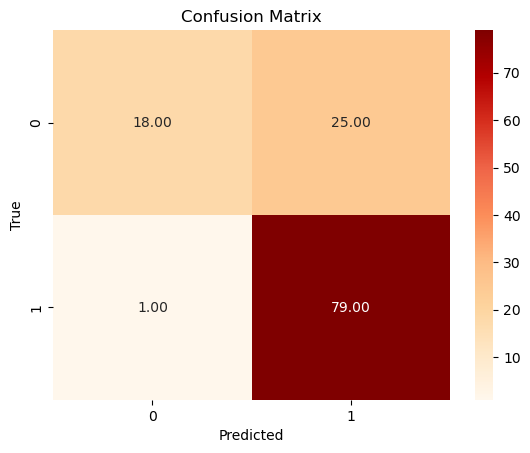

In [65]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='OrRd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [67]:
X = loan_df[selected_features]
y= loan_df['Loan_Status']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [70]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [71]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [72]:
y_pred_knn =knn_model.predict(X_test_scaled)


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
accuracy_knn =accuracy_score(y_test,y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

In [74]:
print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{classification_report_knn}")

KNN Model Evaluation:
Accuracy: 0.7479674796747967
Confusion Matrix:
[[20 23]
 [ 8 72]]
Classification Report:
              precision    recall  f1-score   support

           N       0.71      0.47      0.56        43
           Y       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



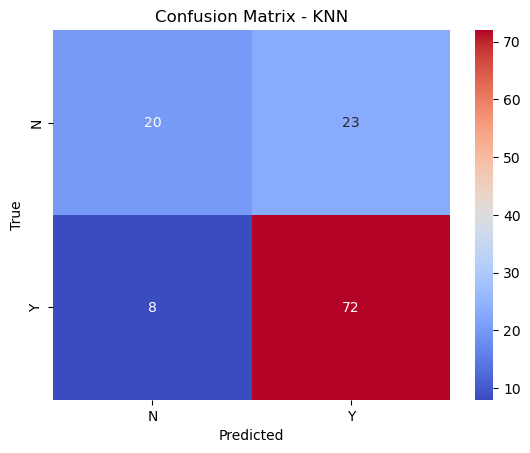

In [78]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='.0f', cmap='coolwarm', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()


# Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_decision_tree =decision_tree_model.predict(X_test_scaled)

In [91]:
accuracy_decision_tree = accuracy_score(y_test,y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)


In [92]:
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix_decision_tree)

Decision Tree Accuracy: 0.6585365853658537
Decision Tree Confusion Matrix:
[[20 23]
 [19 61]]


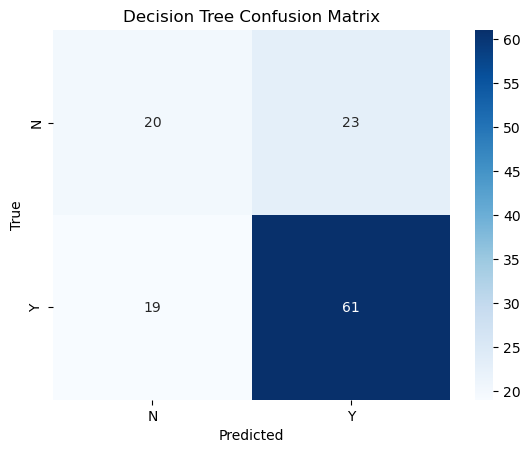

In [93]:
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest Classifier


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [95]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [96]:
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

In [97]:
accuracy_random_forest = accuracy_score(y_test,y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test,y_pred_random_forest)

In [99]:
print(f"Random Forest Accuracy:{accuracy_random_forest}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_random_forest)

Random Forest Accuracy:0.7317073170731707
Random Forest Confusion Matrix:
[[18 25]
 [ 8 72]]


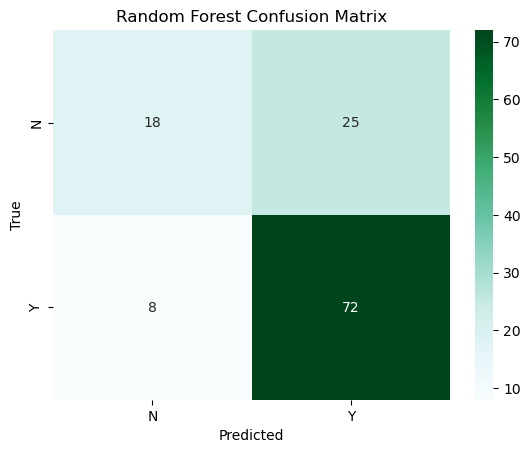

In [101]:
sns.heatmap(conf_matrix_random_forest,annot=True,fmt='d',cmap='BuGn',xticklabels=['N','Y'],yticklabels=['N','Y'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()
